<a href="https://colab.research.google.com/github/shjiinn/Python_Review/blob/master/%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 분류 성능 평가 지표
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

In [ ]:
import warnings
# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋
- sklearn.datasets (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
- sklearn.dataset 에서 제공해주는 다양한 샘플 데이터를 활용합니다. 

### iris 데이터셋
#### 꽃 종류 분류하기
iris 데이터셋 (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

- DESCR : 데이터셋의 정보를 보여줍니다.
- data : feature data.
- feature_names : feature data의 컬럼 이름
- target : label data (수치형)
- target_names : label의 이름 (문자형)

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data=iris.data
feature_names=iris.feature_names
print(data)
print(feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

- sepal: 꽃 받침
- petal: 꽃잎

In [ ]:
target = iris['target']
target[:5]
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [ ]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris['target'] = target
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


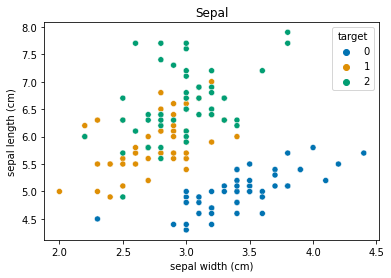

In [166]:
#hue : 그룹별로 다른 컬러로 표현하게
#palette은 그래프의 색 지정 (deep, muted, pastel, bright, dark, colorblind)

sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='colorblind', data=df_iris)
plt.title('Sepal')
plt.show()


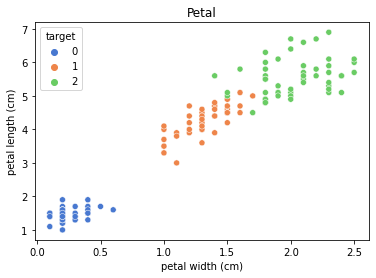

In [ ]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

- 파이선으로 3D 그래프 그리기

https://blog.naver.com/yeoun1999/222190611638

https://jehyunlee.github.io/2021/07/10/Python-DS-80-mpl3d2/


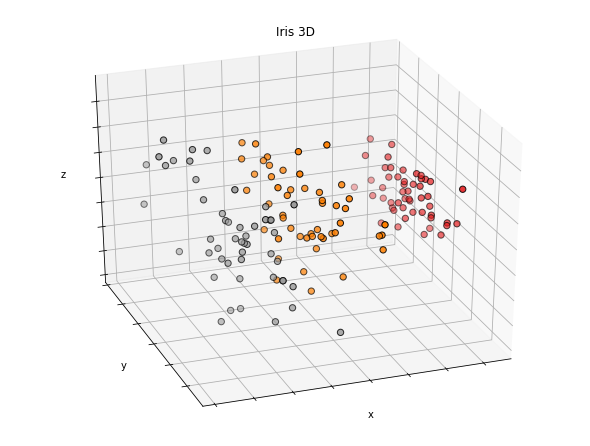

In [ ]:
# plt.title('Sepal') 테이블일 경우.. 중첩되는 부분이 많아서 3D 시각화시켜서 확인

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
 cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#df_iris는 data, feature 모두 다 있는 테이블이므로 target 부분 삭제함..
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',axis=1), df_iris['target'])

In [ ]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

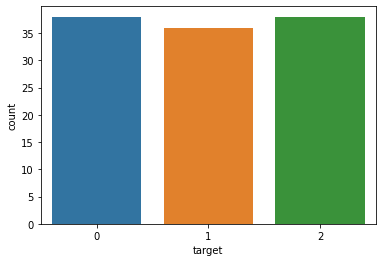

In [ ]:
sns.countplot(y_train)


stratify: label의 클래스의 분포를 균등하게 배분

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

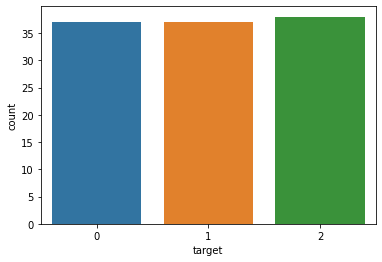

In [ ]:
sns.countplot(y_train)


In [ ]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### 머신러닝 분류 알고리즘
- https://blog.naver.com/summa911/222988453957

### Logistic Regression
도큐먼트 (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?
highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
- 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

one-vs-rest (OvR): K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종
클래스를 판별

one-vs-one (OvO): 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성
으로 선택된 클래스를 판별

대부분 OvsR 전략을 선호합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

step 1: 모델 선언

In [ ]:
model = LogisticRegression()


step 2: 모델 학습

In [ ]:
model.fit(x_train, y_train)


LogisticRegression()

step 3: 예측

In [ ]:
prediction = model.predict(x_valid)

In [ ]:
prediction[:5]

array([1, 2, 0, 0, 0])

step 4: 평가


In [ ]:
(prediction == y_valid).mean()

0.9736842105263158

In [ ]:
accuracy = accuracy_score(y_valid , prediction)
accuracy

0.9736842105263158

SGDClassifier

stochastic gradient descent (SGD): 확률적 경사 하강법

In [ ]:
from IPython.display import Image

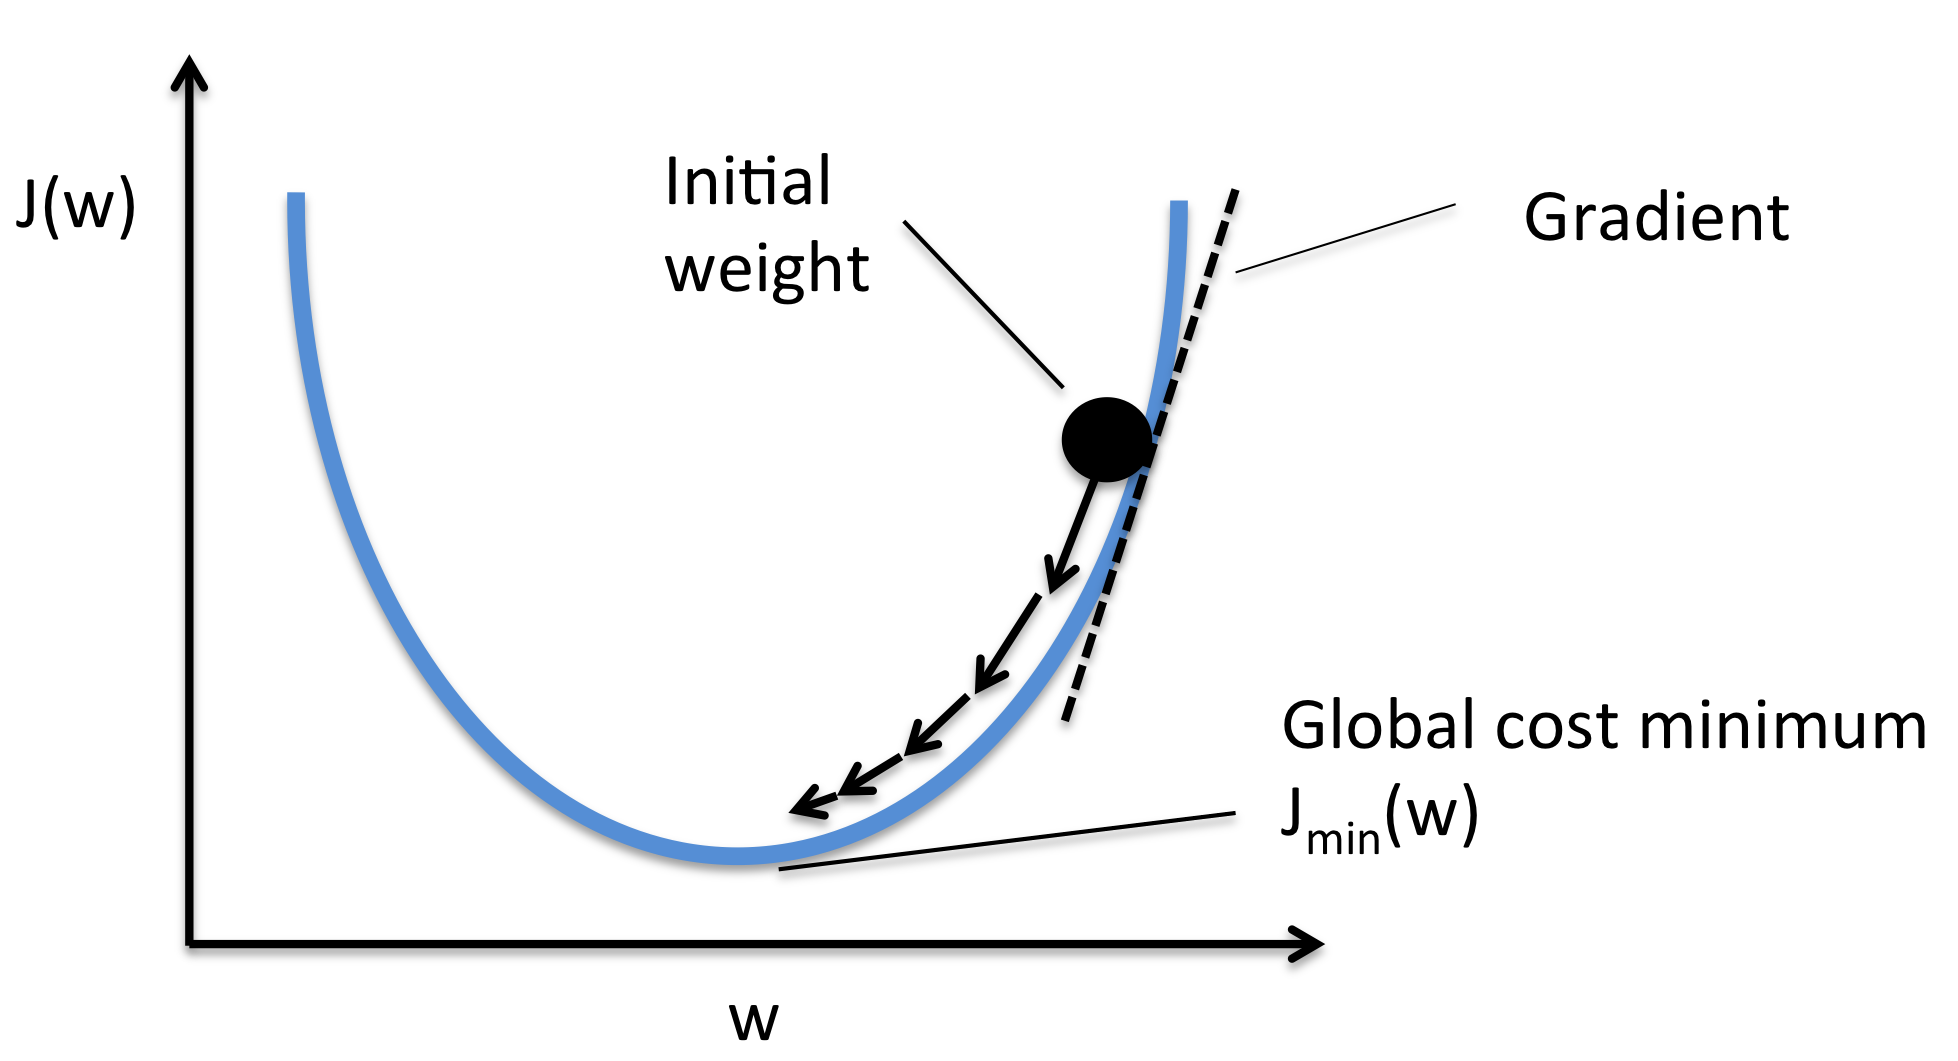

In [ ]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [ ]:
from sklearn.linear_model import SGDClassifier

step 1: 모델 선언

In [ ]:
sgd = SGDClassifier(random_state=42)

step 2: 모델 학습

In [ ]:
sgd.fit(x_train, y_train)

SGDClassifier(random_state=42)

step 3: 예측

In [ ]:
prediction = sgd.predict(x_valid)

In [ ]:
(prediction == y_valid).mean()

0.9736842105263158

###하이퍼 파라미터 (hyper-parameter) 튜닝
도큐먼트 (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

- random_state: 하이퍼 파라미터 튜닝시, 고정할 것
- n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [ ]:
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)


In [ ]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

In [ ]:
prediction = sgd.predict(x_valid)

In [ ]:
(prediction == y_valid).mean()

1.0

### KNeighborsClassifier

#### 최근접 이웃 알고리즘

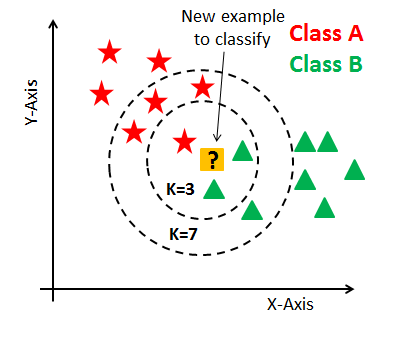

In [ ]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knc = KNeighborsClassifier()


In [ ]:
knc.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
knc_pred = knc.predict(x_valid)


In [ ]:
(knc_pred == y_valid).mean()

0.9736842105263158

### 서포트 벡터 머신 (SVC)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
- 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.


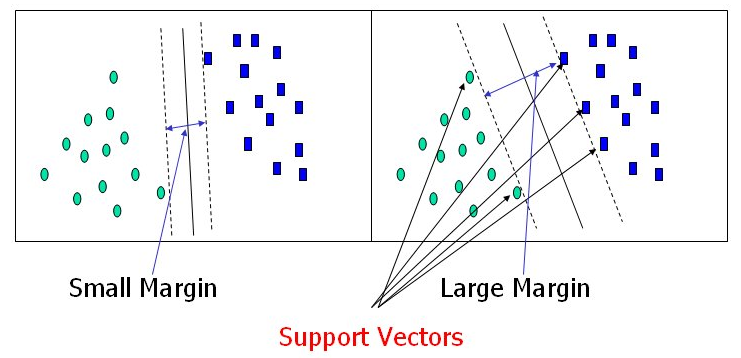

In [ ]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')


LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

- OvsR 전략 사용

도큐먼트 (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc = SVC(random_state=0,)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)


In [ ]:
svc

SVC(random_state=0)

In [ ]:
(svc_pred == y_valid).mean()

0.9473684210526315

In [ ]:
svc_pred[:5]


array([1, 2, 0, 0, 0])

각 클래스 별 확률값을 return 해주는 decision_function()


In [ ]:
svc.decision_function(x_valid)[:5]

array([[-0.21763857,  2.19293285,  1.11214092],
       [-0.2167885 ,  0.83017666,  2.24783565],
       [ 2.23540851,  1.12000584, -0.24929649],
       [ 2.23627875,  1.13434309, -0.25222278],
       [ 2.22383635,  1.18181972, -0.25479563]])

### 의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것


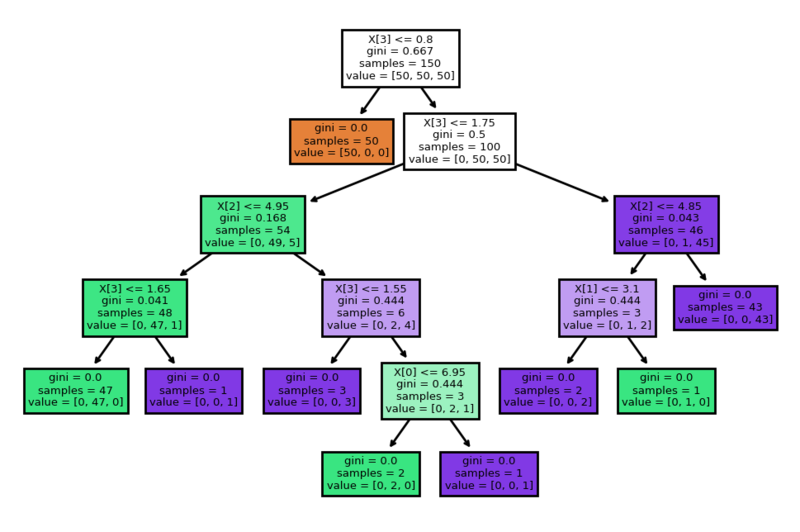

In [ ]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Classification_tree_on_iris_dataset.png/800px-Classification_tree_on_iris_dataset.png', width=500)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)


In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dtc_pred = dtc.predict(x_valid)

In [ ]:
(dtc_pred == y_valid).mean()

0.9473684210526315

### 오차 (Error)

#### 정확도의 함정

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np


유방암 환자 데이터셋을 로드합니다.

target: 0: 악성종양, 1:양성종양


In [163]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

In [ ]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [ ]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


양성 환자 357개 + 악성 환자 5개

In [ ]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [ ]:
sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

모델을 정의하고, 학습합니다.

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
(pred == y_test).mean()

0.978021978021978

In [ ]:
my_prediction = np.ones(shape=y_test.shape)


In [ ]:
(my_prediction == y_test).mean()


0.989010989010989

정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋습니다
하지만, 의사가 과연 무조건 음성 환자로 예측해서 예측율 98.9% 로 말하는 의사는 자질이 좋은 의사일까요?
정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 위와 같은 오류에 빠질 수 있습니다.
이를 보완하고 생겨난 지표들이 있습니다. 차차 알아보겠습니다.

### 오차 행렬 (confusion maxtix)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]])

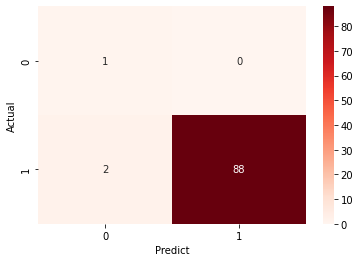

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds', )
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

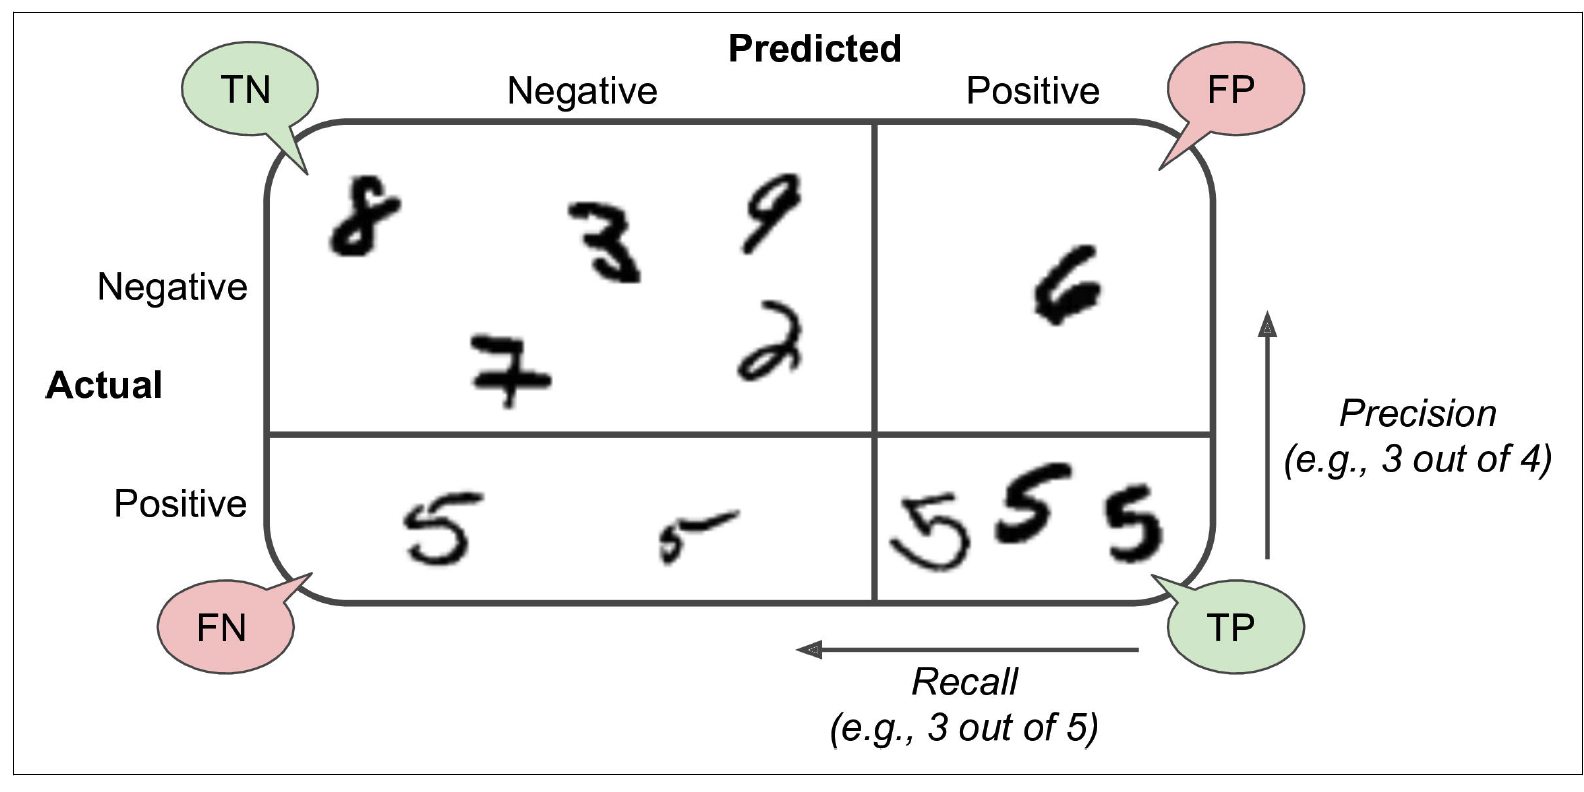

In [ ]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)


In [ ]:
from sklearn.metrics import precision_score, recall_score

### 정밀도 (precision)
#### 양성 예측 정확도
##### TP / (TP + FP)


In [ ]:
precision_score(y_test, pred)

1.0

무조건 양성으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 재현율 (recall)
#### TP / (TP + FN)
##### 정확하게 감지한 양성 샘플의 비율입니다.
##### 민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [ ]:
recall_score(y_test, pred)

0.9777777777777777

In [ ]:
88/90

0.9777777777777777

### f1 score
#### 정밀도와 재현율의 조화 평균을 나타내는 지표입니다.


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9887640449438202